In [1]:
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [60]:
wine = load_wine()
pd.DataFrame(wine.target)
df = pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [61]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [62]:
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=30,splitter='random')
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.8888888888888888

In [63]:
score

0.8888888888888888

In [64]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

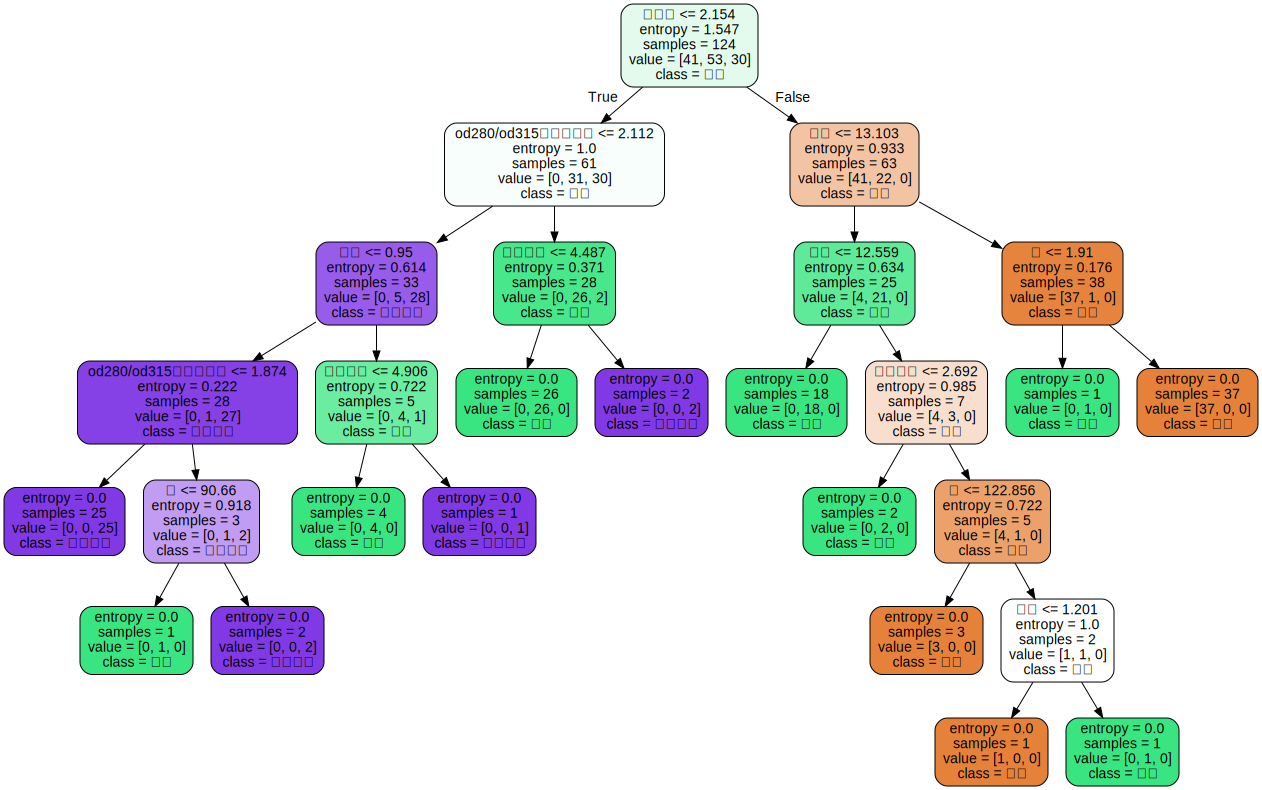

In [65]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

import graphviz as ghz
dot_data = tree.export_graphviz(clf,
                            feature_names=feature_name,class_names=["琴酒","雪莉","贝尔摩德"],
                               filled=True,
                               rounded=True,)
graph = ghz.Source(dot_data)
graph

In [66]:
clf.feature_importances_

array([0.23574528, 0.        , 0.03477002, 0.        , 0.02274682,
       0.        , 0.37568638, 0.        , 0.        , 0.09011686,
       0.06470808, 0.17622655, 0.        ])

In [21]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.2646921537397979),
 ('苹果酸', 0.0),
 ('灰', 0.024731830784098616),
 ('灰的碱性', 0.02455117565265888),
 ('镁', 0.0),
 ('总酚', 0.010267070595943267),
 ('类黄酮', 0.4768472907825352),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.0),
 ('色调', 0.04721628389510385),
 ('od280/od315稀释葡萄酒', 0.07932806565593349),
 ('脯氨酸', 0.07236612889392878)]

In [22]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
reg = DecisionTreeRegressor(random_state=0)
cross_val_score(reg,boston.data,boston.target,cv=10),#scoring='neg_mean_squared_error')


(array([ 0.52939335,  0.60461936, -1.60907519,  0.4356399 ,  0.77280671,
         0.40597035,  0.23656049,  0.38709149, -2.06488186, -0.95162992]),)

In [23]:
import numpy as np
import matplotlib.pyplot as plt


In [24]:
rng = np.random.RandomState(1)
X= np.sort(5*rng.rand(80,1),axis=0)
Y = np.sin(X).ravel()
Y[::5] += 3*(0.5-rng.rand(16))

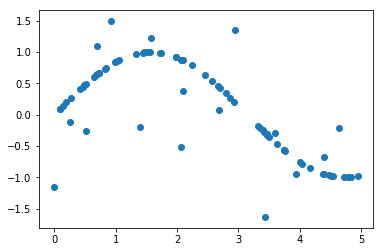

In [25]:
plt.figure()
plt.scatter(X,Y)

In [26]:
regt1 = DecisionTreeRegressor(max_depth=2)
regt2 = DecisionTreeRegressor(max_depth=3)
regt1.fit(X,Y)
regt2.fit(X,Y)
x_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]
x_test
y_1 = regt1.predict(x_test)
y_2 = regt2.predict(x_test)

In [8]:
plt.figure()
plt.scatter(X, Y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(x_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(x_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

NameError: name 'X' is not defined

<Figure size 432x288 with 0 Axes>

In [10]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [11]:
data = pd.read_excel(r"G:\机器学习资料\菜菜的skleran\01决策树课件数据源码\data.xlsx",encoding='gbk',index_col= 0)
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [12]:
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [5]:
data.head()
data['Age'] = data['Age'].fillna(data['Age'].mean())


In [27]:
data = data.dropna()
# labels = data['Embarked'].unique().tolist()
# data['Embarked'] = data['Embarked'].apply(lambda x:labels.index(x))
data['Sex'] = data['Sex'].apply(lambda x : 1 if x =='male' else 0)
data
from sklearn.preprocessing import OneHotEncoder
x = data['Embarked']
s= OneHotEncoder(categories='auto').fit_transform(np.array(x).reshape(-1,1))
pd.DataFrame(s.toarray())

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,0.0,0.0,1.0
7,0.0,0.0,1.0
8,1.0,0.0,0.0
9,0.0,0.0,1.0


In [30]:

data.drop(['Embarked'],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,0,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,0,35.0,0,0,8.0500
7,0,1,0,54.0,0,0,51.8625
8,0,3,0,2.0,3,1,21.0750
9,1,3,0,27.0,0,2,11.1333
10,1,2,0,14.0,1,0,30.0708


In [37]:
data.reset_index(drop=True,inplace=True)
pd.concat([data,pd.DataFrame(s.toarray())],axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1,2
0,0,3,0,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,S,0.0,0.0,1.0
4,0,3,0,35.0,0,0,8.0500,S,0.0,0.0,1.0
5,0,1,0,54.0,0,0,51.8625,S,0.0,0.0,1.0
6,0,3,0,2.0,3,1,21.0750,S,0.0,0.0,1.0
7,1,3,0,27.0,0,2,11.1333,S,0.0,0.0,1.0
8,1,2,0,14.0,1,0,30.0708,C,1.0,0.0,0.0
9,1,3,0,4.0,1,1,16.7000,S,0.0,0.0,1.0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
Survived    712 non-null int64
Pclass      712 non-null int64
Sex         712 non-null int64
Age         712 non-null float64
SibSp       712 non-null int64
Parch       712 non-null int64
Fare        712 non-null float64
Embarked    712 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 44.6+ KB


In [41]:
x = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.3)
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [42]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.7453183520599251

In [43]:
clf = DecisionTreeClassifier(random_state=25)
score = cross_val_score(clf,x,y,cv=10).mean()
score

0.7739274770173645

0.8205026455026456


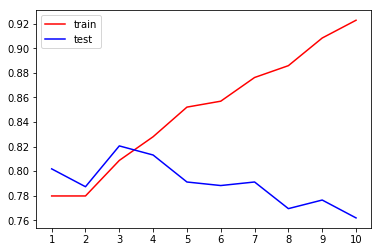

In [47]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25,
                                max_depth=i+1,
                                criterion='entropy')
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,Xtest,Ytest,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [48]:
parameters = {'splitter':('best','random')
,'criterion':("gini","entropy")
,"max_depth":[*range(1,10)]
,'min_samples_leaf':[*range(1,50,5)]
,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
}
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'splitter': ('best', 'random'), 'criterion': ('gini', 'entropy'), 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46], 'min_impurity_decrease': [0.0, 0.02631578947368421, 0.05263157894736842, 0.07894736842105263, 0.10526315789473684, 0.131...0526315789, 0.39473684210526316, 0.42105263157894735, 0.4473684210526315, 0.47368421052631576, 0.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
GS.best_params_
GS.best_score_

0.8183279742765274

In [50]:
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}